In [1]:
%%capture
# Install the autograder to check your answers as you go along
import sys
!{sys.executable} -m pip install otter-grader
# Initialize Otter 
import otter
grader = otter.Notebook("group_activity8.ipynb")

# In-class coding exercise #8
Objective: In this exercise you will review using Pandas Dataframes and plotting. Additionally, you will practice using SciPy's linear regression.

## Introduction to group coding exercises
Today you‚Äôll work on this exercise in the same groups of 3-4 you were assigned last week, submitting a single notebook file at the end of the class period. Decide amongst yourselves which member will upload the completed notebook to Gradescope this week. Make sure that everyone takes a turn being the ‚ÄúUploader‚Äù. _You cannot upload the final code two weeks in a row._

Designate a different group member to be the "Reporter". The Reporter will be in charge of participating in the group discussion at the end of the class session.

### Workflow
Each question will be timed to ensure that everyone gets to work on at least a part of every question. Group activities are not graded by completeness or correctness, but by effort. We will be breaking down each question in the following order:  
1. Independent work 
2. Group work and discussion on coding question
3. Group work and discussion on reflection questions

You are welcome and encouraged to communicate with other groups and the teaching team when you feel stuck on a problem. 

As a reminder, we will be grading based best practices in coding. These include: 
1) Variables are used to store objects

2) Code is commented adequately

3) Variables are names appropriately

4) Code is efficient with minimal unnecessary lines 

5) Documenting help from outside sources, such as from other groups or online documentation. 

6) Final notebook fully runs from start to finish. A good way to check this is restarting the kernel and fully running through all the cells to check for any errors.

### Storing your answers
In the code cells where you will write your answers, there will be comments denoting:

"**# your code**"

and 

"**# answer variables**"

You may store any intermediary variables in the **your code** section. If you do not have any intermediary, you can also store your answer directly in the answer variables.

### Required Plot Elements for Figures
This assignments requires you to create and design figures using `matplotlib`. To practice good plotting practices, each figure will require the following to receive full points:
1) Concise, descriptive title for each figure/subplot
2) Axis labels with units (when possible)
3) Appropriate axis limits (minimum and maximum)
4) Appropriate tick resolution
5) Legend when using different datasets 
6) Appropriate font size (a good range is 12-15)

## Note here **and in the Gradescope submission** each of your group members:
1. Leo
2. Christina
3. Sofia

# Question 1: Global temperature concentrations

The figure below shows CO2 concentration over the past three centuries. We will compare this trend in CO2 with measured global temperature anomalies stored in "NASA_GISS_global_temp.csv" aquired from 
[NASA's Goddard Institute for Space Studies](https://data.giss.nasa.gov/gistemp/). Today you will read this data using Pandas, plot it, and model it using SciPy's linear regression.

<img src="https://i.ibb.co/Hz4rMtc/co2-photo.png" width="700" />

*Image: Atmospheric CO2 from 1700 to 2020. Source: [Scripps/UCSD](https://keelingcurve.ucsd.edu/).*


## Part 1: Plot initial data (20 minutes)
1) Set your `filepath` variable to the string representation to the "NASA_GISS_global_temp.csv" in the "data" folder. 
Load the file as a DataFrame using Pandas into the `global_temp` variable. Using the "index_col" argument, set the "Year" column as your DataFrame indexes to load years as integers.

2) Make a plot of the 1880-2019 time series for Temperature Anomaly. Set the year (now the index) in the x-axis, and the "Temp_anomaly" column in the y-axis. Include the following:

>a) Markers for each data point

>b) Grid

>c) All required plot elements listed in Assignment Instructions

Temp_anomaly  Temp_anomaly_smooth
Year                                   
1880         -0.16                -0.08
1881         -0.07                -0.12
1882         -0.10                -0.16
1883         -0.16                -0.19
1884         -0.27                -0.23
...            ...                  ...
2015          0.90                 0.83
2016          1.01                 0.87
2017          0.92                 0.91
2018          0.85                 0.95
2019          0.98                 0.98

[140 rows x 2 columns]

Text(0.5, 0, 'Sampling Year')

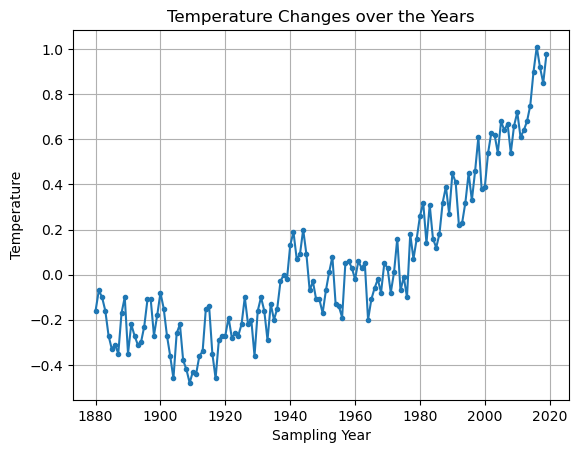

In [59]:
# Import NumPy, Pandas, SciPy, Matplotlib
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
# your code

# answer variables
#created filepath and used read function to open the filepath 
#displaying it to understand the data at hand 

filepath = 'data/NASA_GISS_global_temp.csv'
global_temp = pd.read_csv(filepath, index_col=['Year'])
display(global_temp)
# create plot 
#locking out the selected columns for plotting
#years = global_temp.loc[:, 'Year'].index
#temp_an = global_temp.loc[:, 'Temp_anomaly'].index

#calling from the new indexing from the index_col function 
fig, axs = plt.subplots()
axs.plot(global_temp.index, global_temp.Temp_anomaly, marker= '.')
axs.grid()
axs.set_title('Temperature Changes over the Years')
axs.set_ylabel('Temperature')
axs.set_xlabel('Sampling Year')
#axs.plot(years, temp_an, marker= '.')
#I ran out of time to put in all of the proper titling and units and such
#apologies 

In [18]:
grader.check("Question 1, Part 1")

Question 1, Part 1 results: All test cases passed!

## Part 2: Design linear regression model (25 minutes)
3) Use the scipy.stats `linregress()` function to calculate a linear regression on the entire 1880-2019 time series. Do this in one line of code and store the output in the `slope`, `intercept`, `rvalue`, `pvalue`, and `stderr` variables. **Hint: years (index) are the x values, and Temp_anomalys are the y values (slide 11-12 in prelectures).** (0.5 point)

4) Calculate linear regression fit: (1 point)
>1) Print the slope (including units), **r-squared value** (`rvalue` squared), and p-value rounded to 3 decimal places.
>2) Store the years (index) from `global_temp` in the `x_values` variable.
>3) Use the `slope`, `intercept`, and your `x_values` to calculate the linear regression fit*. Store the resulting array in the `y_values` variable. 

*_HINT: Linear Regression follows the formula below_
> **y = mx+b**

5) Plot your linear regression fit and compare against the original data: (0.5 point):
>1) Copy and paste your code to plot the temperature anomaly time series from part 1. 
>2) Plot the regression line that you just calculated on top using **different line type and color than the default settings**. 
>3) Add a legend (make sure to use the "label" argument in the `plot()` function).

0.007454199558286504 -14.488819181736682 0.8657723931626924 2.529966495759858e-43 0.0003667819824809268


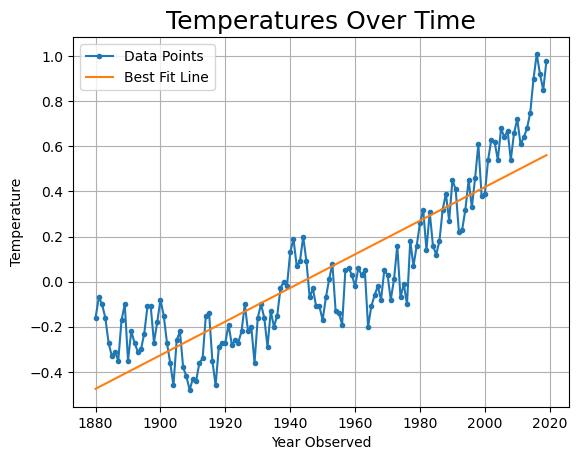

In [38]:
# your code
#Linear interpolation and Regression calculation with y =mx+b
#Best fit line calcs with 
#x axis*slope + intercept value
#indexing the area with desired slope
#inds = 
#slope, intercept, r, p, sterr = stats.linregress(global_temp.index, 
                                                #global_temp.Temp_anomaly)

# answer variables
slope, intercept, rvalue, pvalue, stderr = stats.linregress(global_temp.index, global_temp.Temp_anomaly)
print(slope, intercept, rvalue, pvalue, stderr)
#pulling what we know is the x axis or first column and properly labeling it
#then with algebra plugging in our y=mx+b solving for y
x_values = global_temp.index
y_values = x_values*slope+intercept

# copy and paste plot from part 1 and add line for linear regression fit
fig, axs = plt.subplots()
axs.plot(global_temp.index, global_temp.Temp_anomaly, marker= '.', label='Data Points')
axs.plot(x_values, y_values, label='Best Fit Line')
#R^2 = 
axs.grid()
#All of the things to make it readable and presentable
axs.set_title('Temperatures Over Time', fontsize=18)
axs.set_xlabel('Year Observed')
axs.set_ylabel('Temperature')
axs.legend()

In [37]:
grader.check("Question 1, Part 2")

Question 1, Part 2 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Data Interpretation (10 minutes)
6) Answer the following questions in a text box (reference SciPy lecture slides if needed):

>a. How much variance in the data is explained by the regression? _HINT: calculate r^2 value to get the variance, check slide 13 on how to get r^2 from the rvalue_

>b. Looking at the p-value, is the 1880-2019 trend significant at the 95% confidence level? How can you tell?

>c. Is this linear regression appropriate for this data? Why or why not? (2-3 sentences)


a. The r sqaured value represent the amount of variance in y explained by x. 
The closer r squared is to 1 the stronger the correlaion is

b. The p-value brings in the confidence in our data or how much error there
could be. This unfortunately can get hacked by inundating our data set with 
a lot of data. The p-value essentially asks how strong the correlation confidence is. There is consistency in trends.

c. I think that there are different slopes for different pieces of the data and so I would say that despite a strong correlation and high p-value there it might be more meaningful to have differnt calculations of our means or to smooth the data out first and then calculate the slope that way so that you may have a more meaningul slope? 

<!-- END QUESTION -->

## Question 2: CO2 Time Series
Now that we've looked at the global temperature data, we can start our comparison against CO2 data. Today, we will be using observations from the Mauna Loa Laboratory, otherwise known as the Keeling Curve [(Keeling et al. 2017)](https://library.ucsd.edu/dc/object/bb3859642r). 


### Part 1 (10 minutes)
1) Using `pandas.read_csv()`, load the data from the "keeling_curve_monthly.csv" file in the "data" folder. Set your dataframe to the `keeling` variable. 

2) Reset the "time" column to datetime object using `pandas to_datetime()`. 

2) Make a quick plot of the CO2 time series. Don't worry if the plot doesn't look very clean. Answer the following questions:

>a) What do you notice about the data?

>b) Are the recurring patterns in the time series? 

time     CO2
0    1958-01-01     NaN
1    1958-02-01     NaN
2    1958-03-01  315.71
3    1958-04-01  317.45
4    1958-05-01  317.51
..          ...     ...
787  2023-08-01  419.56
788  2023-09-01  418.06
789  2023-10-01  418.40
790  2023-11-01  420.12
791  2023-12-01  421.65

[792 rows x 2 columns]

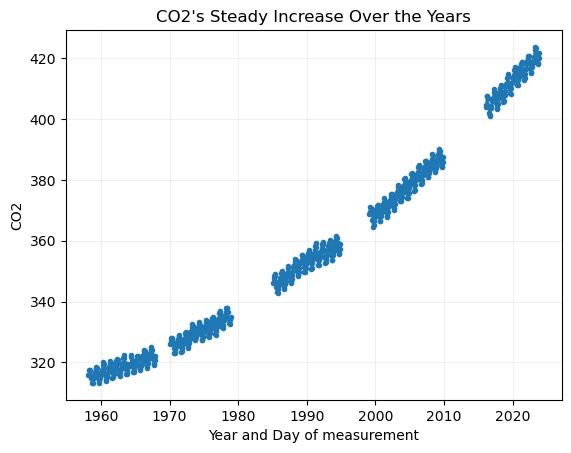

In [51]:
# load data and clean
#creating a filepath first 
filepath2 = 'data/keeling_curve_monthly.csv'
keeling = pd.read_csv(filepath2)
#displaying to understand what is present
display(keeling)
#formatting the time with to_datetime
keeling['time']=pd.to_datetime(keeling['time'], format='%Y-%m-%d')
# your code for plotting
#naming the variables for x and y
time = keeling['time']
co2 = keeling['CO2']
fig, axs = plt.subplots()
axs.plot(time, co2,marker= '.')
#Making it pretty
axs.set_xlabel('Year and Day of measurement')
axs.set_ylabel('CO2')
axs.set_title("CO2's Steady Increase Over the Years")
#adding a grid to better see missing years
axs.grid(alpha=0.2)

In [49]:
grader.check("Question 1, Part 4")

Question 1, Part 4 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Part 2: 1-D Interpolate Missing Data (20 minutes)
Oh no, Todd strikes again! It looks like Kathy's cat sat on her computer before she uploaded the data to GitHub :( 

<img src = "https://i.ibb.co/7r2hcLZ/IMG-3273-2.jpg" width = 250>

1) There are missing values for certain years within the dataset. What are the missing values represented by? Write your answer in a comment in the solution cell. 

2) Perform 1D interpolation using pandas `interpolate()` on the "CO2" column of `keeling`. Create a new column in your `keeling` dataframe named "filled" to place your interpolated values. 

3) Create a plot of your new time series with interpolated values. By default, the interpolation method is _linear_. Experiment with different methods by checking the [documentaion](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html). 
How does choosing different methods impact your interpretation? Write your answer in a comment in the solution cell. 

time     CO2
0   1958-01-01     NaN
1   1958-02-01     NaN
2   1958-03-01  315.71
3   1958-04-01  317.45
4   1958-05-01  317.51
..         ...     ...
787 2023-08-01  419.56
788 2023-09-01  418.06
789 2023-10-01  418.40
790 2023-11-01  420.12
791 2023-12-01  421.65

[792 rows x 2 columns]

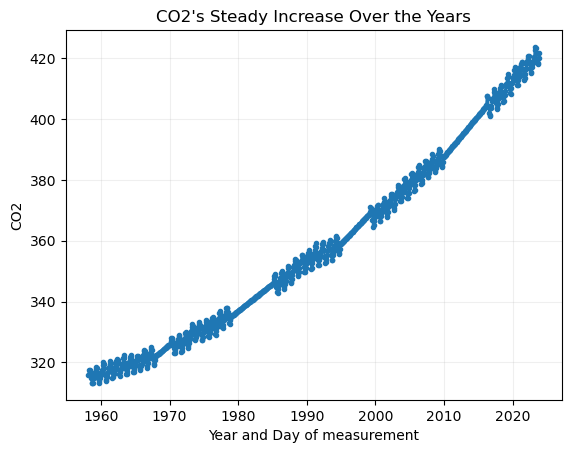

In [55]:
## response to step 1
#The missing values are represented by an absence of data so the gaps 
#between our blue lines (no connection in data points) represents the gaps

## response to step 3
#I did not have time to plot different time series interpolated data! 
#I like how it turned out because it shows where the data was 'smoothed' and
#'elongated' or interpolated. I think it would be cool to be clear with the data
#and find a way to make any interpolated data into a new column in the data
#set so that way I could make the color coding different or make the markers 
#different so that way it can be visible where the gaps were filled. I think 
#the filled lines in the data honors the overall visible curve though.

# your code for interpolation

#we need to think our data as a grid where we are multiplying what 
#we currently have in order to fill in the gaps of data based
#on the trends that are present
CO2_new = keeling.interpolate()

#interpolation in 1d on pandas defaults to linear model and we don't have any 
#additional parameters to give it so now if we graph with new variables from 
#the interpolated data we will see in the graph will 'filler' lines or gapless data
# your code for plotting
time = CO2_new['time']
co2 = CO2_new['CO2']
fig, axs = plt.subplots()
axs.plot(time, co2,marker= '.')
#Making it pretty
axs.set_xlabel('Year and Day of measurement')
axs.set_ylabel('CO2')
axs.set_title("CO2's Steady Increase Over the Years")
#adding a grid to better see missing years
axs.grid(alpha=0.2)



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Reflection questions (5 minutes)

The purpose of the reflection is to inform us as instructors about students comfort level with course content. We use these answers to inform how we spend class time and design coursework in subsequent weeks. This question is graded for completeness, so please answer each question in the text box below. Be concise in your answers (max. 2 sentences). 

1) What do you feel you excelled at in this exercise? Why?

2) What did you struggle with most in the exercise? Why?

3) Is there any section of the question that you did not complete? If so, briefly describe why and the section you spent the most time on. 

4) Is there any topic you feel we need to revisit or review in class? Why?

1. I feel like we as a group excelled at problem solving. I liked figuring out how to get the output desired even if it differed from the insturctions and then asking a TA for help on how I should have everything formatted and extracted in order to pass the grader checks. I feel like this made me a stronger code and made our group's communication better becasue it led to us talking more. 

2. I feel like it's difficult to explain syntax and why it is phrased the way it is and that led to many points of being stuck in our exercises today. It was also slighly embarassing to explain why I did something the way I did and not have the TA that helped me understand why I got through it in a different way. It was difficult at times to get past that embarrasment and explain to my group members my thought process and how I fixed it. I also feel like matching our pacing as a group was difficult to keep at times, but, with active communication; it improved throughout the progression of the exercises

3. We completed nearly everything and ran out of time on hitting all the points required for the graph in the first section and then the last. We wanted to prioritize fully understanding what we were doing while we werte doing it. I didn't input a proper min or max for the graph to be properly constrained! That was a mistake on my part but I understand it should have been there given the time to fix it. 

4. I would really like to revisit some earlier syntax that we learned such as strpdate time and understanding how to combine it with more complicated functions. It was difficult to figure out the proper syntax of combining functions without intermediary variables in order to have efficient code. It would also be nice to revisit loops and data interpolation techniques via differing libraries such as xr pd or np.


<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [56]:
grader.check_all()

Question 1, Part 1 results: All test cases passed!

Question 1, Part 2 results: All test cases passed!

Question 1, Part 4 results: All test cases passed!